# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="REMD-1" href="#REMD"><span class="toc-item-num">1&nbsp;&nbsp;</span>REMD</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Estimate-errors-from-block-averaging-11" href="#Estimate-errors-from-block-averaging"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Estimate errors from block averaging</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Symmetrize-counts-and-estimate-uncertainty-from-counts-12" href="#Symmetrize-counts-and-estimate-uncertainty-from-counts"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Symmetrize counts and estimate uncertainty from counts</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Arrhenius-fits-13" href="#Arrhenius-fits"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Arrhenius fits</a></div><div class="lev1 toc-item"><a data-toc-modified-id="MD-2" href="#MD"><span class="toc-item-num">2&nbsp;&nbsp;</span>MD</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Estimate-errors-from-block-averaging-21" href="#Estimate-errors-from-block-averaging"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Estimate errors from block averaging</a></div><div class="lev2 toc-item"><a data-toc-modified-id="now-symmetrise-and-calculate-erros-22" href="#now-symmetrise-and-calculate-erros"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>now symmetrise and calculate erros</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Comparison-3" href="#Comparison"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison</a></div><div class="lev1 toc-item"><a data-toc-modified-id="quick-comparison-4" href="#quick-comparison"><span class="toc-item-num">4&nbsp;&nbsp;</span>quick comparison</a></div>

In [3]:
import sys
sys.path.append("../bin/")
%matplotlib inline

In [4]:
! tail ../bin/kinetics/ala_kinetics.py

    tp_comb_df (optional)
    
    """                     
    _pt = pd.concat(pt_l).groupby("temperature").mean().reset_index()
    tp_comb_df = pd.concat(tp_df_l)
    r_c = rates_ala4_multi_temp(tp_comb_df, _pt, combined_total_time, n_states, trans_names=trans_names)
    if return_all:
        return r_c, _pt, tp_comb_df
    else:
        return r_c    


In [6]:
import seaborn as sns
cl = sns.color_palette()
from kinetics.ala_kinetics import *
import os
from kinetics.sorted_lifetimes import *
import matplotlib
import glob
from kinetics.plt_kinetics import *
from kinetics.arrhenius import *

In [16]:
recalc=True

In [17]:
# "../../../alanine-dipeptide/remd-1/temp_list_formatted"
tmp_l = np.genfromtxt("temp_list_formatted")

# REMD

In [18]:
#q_path="/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/remd-1/out-st1/demux_1ps/process/phi_psi/*_phi_psi_p.txt"
q_path = "./remd/*_phi_psi_p.txt"

In [19]:
#! ls -lrt /home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/remd-1/out-st1/demux_1ps/process/phi_psi/*_phi_psi_p.txt

In [20]:
! ls remd

0_phi_psi_p.txt   2_phi_psi_p.txt  6_phi_psi_p.txt  replica_temp_full.txt
10_phi_psi_p.txt  3_phi_psi_p.txt  7_phi_psi_p.txt
11_phi_psi_p.txt  4_phi_psi_p.txt  8_phi_psi_p.txt
1_phi_psi_p.txt   5_phi_psi_p.txt  9_phi_psi_p.txt


In [21]:
q_dict = make_q_dict(q_path, "_", split_pos=0, last_index=-1)

In [22]:
rep_ar = np.genfromtxt('remd/replica_temp_full.txt')
run_name ="remd-out/ala_remd_st1_dt1ps_23may17"
s=[[-100, 50], [0, 150]]

In [23]:
o_remd_st1 = get_rates_pop_multi_temp(q_dict, rep_ar, run_name, state_def=s,
                                      return_raw_events=True, remd=True,
                                      recalc=recalc, split_state_tp=True,
                                      stop_tp_at_next_end=True, verbose=False)

0
1
2
3
4
5
6
7
8
9
10
11


In [24]:
state_df, all_tp_temp_df, pt, rates, events = o_remd_st1

## Estimate errors from block averaging

In [25]:
pt_5bl, rt_5bl = block_rates_pop_m(state_df, rep_ar, all_tp_temp_df, s, 5 )

30000
[      0.   30000.   60000.   90000.  120000.  150000.]


In [26]:
bl = av_blks_df(rt_5bl, pad_number_blocks=5, return_event_weight=True, verbose=False)

In [27]:
! mkdir -p remd-out/bl-av-err
with open ("remd-out/bl-av-err//bl_r_ala2_remd1_st1", 'wb') as p:
     pickle.dump(bl, p)
        
remd_st1_r_av = bl[0]
remd_st1_err = bl[1]
s_weights = bl[2]

## Symmetrize counts and estimate uncertainty from counts

In [28]:
remd_total_time = rep_ar[-1,0] - rep_ar[0,0]

In [29]:
r_s = sym_counts_calc_rate(rates, pt,
                          rates.type.unique(),
                          remd_total_time,
                          time_unit_factor=1000)

In [30]:
r_s_ln  = err_log_rate(r_s, weight_name="sym_weight",
                      diff_from_est=True)

../bin/kinetics/ala_kinetics.py:784: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(- 1.0 / np.sqrt(N)), np.exp(1.0 / np.sqrt(N))
../bin/kinetics/ala_kinetics.py:811: RuntimeWarning: invalid value encountered in double_scalars
  c['std_p'] = c.apply(lambda x: np.float64(x['rate'])* count_err(x[weight_name])[1] if pd.notnull(x['rate'])  else 0, axis=1)


## Arrhenius fits

In [31]:
ln_hc = np.log(r_s_ln[r_s_ln.type==(0,0,0,1)].rate.values.astype(np.float64))
ln_ch = np.log(r_s_ln[r_s_ln.type==(0,1,0,0)].rate.values.astype(np.float64))

In [32]:
popt= curve_fit(arrhenius, tmp_l, ln_hc)
Ea_hc, A_hc = popt[0][0], popt[0][1]
Ea_hc, A_hc

(14042.126247751974, 1795.7780759821746)

In [33]:
popt = curve_fit(arrhenius, tmp_l, ln_ch)
Ea_ch, A_ch = popt[0][0], popt[0][1]
Ea_ch, A_ch

(16425.789118242308, 3006.3526936664825)

# MD

In [34]:
# "/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st1-multi-temp/phi_psi/ala1_md_st1_{:.2f}_f.xtc_phi_psi_p.txt"
# /home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_{:.2f}_f.xtc_phi_psi_p.txt
# /home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st3-multi-temp/phi_psi/ala1_md_st3_{:.2f}_f.xtc_phi_psi_p.txt

In [35]:
! ls /home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/*_p.txt | tail

/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_305.00_f.xtc_phi_psi_p.txt
/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_310.00_f.xtc_phi_psi_p.txt
/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_315.00_f.xtc_phi_psi_p.txt
/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_320.00_f.xtc_phi_psi_p.txt
/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_325.00_f.xtc_phi_psi_p.txt
/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_330.00_f.xtc_phi_psi_p.txt
/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_335.00_f.xtc_phi_psi_p.txt
/home/tb/lustelzl/Projects/kinetics/alanine-dipeptide/run1/out-st2-multi-temp/phi_psi/ala1_md_st1_340.00_f.xtc_phi_psi_p.txt


In [36]:
md1_d = {}
for i, t in enumerate(tmp_l):
    md1_d[i] = np.genfromtxt("md_1/ala1_md_st1_{:.2f}_f.xtc_phi_psi_p.txt".format(
            t))

md2_d = {}
for i, t in enumerate(tmp_l):
    md2_d[i] = np.genfromtxt(
        "md_2/ala1_md_st1_{:.2f}_f.xtc_phi_psi_p.txt".format(
            t))

md3_d = {}
for i, t in enumerate(tmp_l):
    md3_d[i] = np.genfromtxt(
        "md_3/ala1_md_st3_{:.2f}_f.xtc_phi_psi_p.txt".format(
            t))

In [37]:
d = {'md_st1' : md1_d, 'md_st2' : md2_d, 'md_st3' : md3_d}

In [38]:
st_l =  ['md_st1', 'md_st2', 'md_st3']

In [39]:
corr_out_d = {}

bl_l = []

for i, st_name in enumerate(st_l):
    print i
    md_d = d[st_name]
    _rep_fn ="md-out/st{}/rep_md_".format(i+1)+st_name+'_corr.npy'
    if os.path.exists(_rep_fn):
        rep_md = np.load(_rep_fn)
    else:
        rep_md = gen_rep_ar_md(tmp_l, time_pts= md_d[0][:,0])
        np.save(_rep_fn,rep_md)
    _run_name = "md-out/st{}/".format(i+1)+st_name+'_corr'
    print _run_name
    md_st_df, md_tp_df, md_p, md_r =  get_rates_pop_multi_temp(md_d, rep_md,
                                                               _run_name,
                                                               state_def=s, remd=False,
                                                               recalc=False,
                                                               split_state_tp=True,
                                                               stop_tp_at_next_end=True, verbose=False)
    
   
    md_p_5bl, md_r_5b =  block_rates_pop_m(md_st_df, rep_md, md_tp_df, s, 5)
    
    md_r_5b.dropna(inplace=True)
    md_r_5b["rate"] = md_r_5b["rate"].astype(float)   
    # don't average here concat the blocks
    bl_l.append(md_r_5b)
    
    corr_out_d[st_name] =  md_st_df, md_tp_df, md_p, md_r
    
md_df_corr = pd.concat(bl_l)

0
md-out/st1/md_st1_corr
prev calculated rates md-out/st1/md_st1_corr_rates.pickle
30000
[      0.   30000.   60000.   90000.  120000.  150000.]
1
md-out/st2/md_st2_corr
prev calculated rates md-out/st2/md_st2_corr_rates.pickle
30000
[ 150000.  180000.  210000.  240000.  270000.  300000.]
2
md-out/st3/md_st3_corr
prev calculated rates md-out/st3/md_st3_corr_rates.pickle
30000
[ 300000.  330000.  360000.  390000.  420000.  450000.]


need to find combined rate for the three set of MD simulations

In [40]:
corr_out_d.keys()

['md_st3', 'md_st2', 'md_st1']

In [41]:
corr_out_d['md_st1'].__len__() # md_st_df, md_tp_df, md_p

4

In [42]:
pt_l_md = [ corr_out_d[st][2] for st  in st_l]

In [43]:
tp_l_md = [ corr_out_d[st][1] for st in st_l]

In [44]:
total_time = 0
for k, v in d.items():
    print v[0].__len__()
    total_time += v[0].__len__()
    print  v[0][-1,0] - v[0][0,0]
total_time

150001
150000.0
150001
150000.0
150001
150000.0


450003

In [45]:
ala_ttime = total_time - 3

In [46]:
trans_l = possible_transitions(4)

In [47]:
mdc_r, mdc_pt, mdc_tp = combine_rates_stages_simple(
    pt_l_md, tp_l_md, ala_ttime, 4, trans_l, return_all=True)

## Estimate errors from block averaging

In [48]:
avr_md3, err_md3, w_md3 = av_blks_df(md_df_corr, pad_number_blocks=15,
                                     return_event_weight=True)

##  now symmetrise and calculate erros

In [49]:
md_rt_s = sym_counts_calc_rate(mdc_r, mdc_pt, mdc_r.type.unique(),
                              ala_ttime, verbose=False)

In [50]:
md_rt_s_ln = err_log_rate(md_rt_s, weight_name="sym_weight",
                         diff_from_est=True)

In [51]:
md_rt_s_ln.columns

Index([u'temperature', u'type', u'rate', u'events', u'sum_weight',
       u'rev_events', u'rev_sum_weight', u'sym_weight', u'std_p', u'std_m',
       u'err_m', u'err_p'],
      dtype='object')

# Comparison

* block averaging errors from MD
* block averaging errors from REMD

In [52]:
remd_st1_err.head()

type,"(0, 0, 0, 1)","(0, 0, 1, 0)","(0, 0, 1, 1)","(0, 1, 0, 0)","(0, 1, 1, 0)","(0, 1, 1, 1)","(1, 0, 0, 0)","(1, 0, 0, 1)","(1, 0, 1, 1)","(1, 1, 0, 1)","(1, 1, 1, 0)"
temperature,,,,,,,,,,,
0.0,0.825755,NaN,NaN,0.194199,0.032848,0.024609,0.847878,NaN,0.523376,NaN,11.525171
1.0,0.412159,NaN,NaN,0.378979,NaN,0.036807,NaN,NaN,2.273904,16.758198,22.152661
2.0,0.828086,NaN,NaN,0.859324,NaN,0.059537,2.599744,NaN,1.241983,9.115854,6.238652
3.0,0.487141,NaN,NaN,0.542855,0.039278,0.007170,NaN,0.877333,1.820382,5.796150,19.585844
4.0,0.634485,NaN,NaN,0.538051,0.040965,0.023679,NaN,0.590752,2.120572,12.405796,14.436461


In [53]:
err_md3.head()

type,"(0, 0, 0, 1)","(0, 0, 1, 0)","(0, 0, 1, 1)","(0, 1, 0, 0)","(0, 1, 1, 0)","(0, 1, 1, 1)","(1, 0, 0, 0)","(1, 0, 0, 1)","(1, 0, 1, 1)","(1, 1, 0, 0)","(1, 1, 0, 1)","(1, 1, 1, 0)"
temperature,,,,,,,,,,,,
0.0,0.804026,NaN,NaN,0.381262,NaN,0.024146,37.217387,NaN,20.548194,NaN,43.878212,45.710813
1.0,0.532967,0.070699,NaN,0.500330,NaN,0.035118,0.456613,NaN,4.113860,NaN,6.421248,23.960506
2.0,0.534953,0.069668,0.068787,0.527552,NaN,0.060107,0.218250,0.422815,2.360126,NaN,14.670700,16.722605
3.0,0.852880,NaN,NaN,0.546592,NaN,0.035070,1.397014,0.604385,2.033759,NaN,35.238433,29.927949
4.0,0.462056,0.039614,NaN,0.528149,0.044138,0.036660,0.311934,1.273013,2.514784,NaN,10.791250,23.100373


(0, 0, 0, 1)
(0, 0, 1, 0)
(0, 0, 1, 1)
(0, 1, 0, 0)
(0, 1, 1, 0)
(0, 1, 1, 1)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 1, 1)
(1, 1, 0, 0)
(1, 1, 0, 1)
(1, 1, 1, 0)
108 24


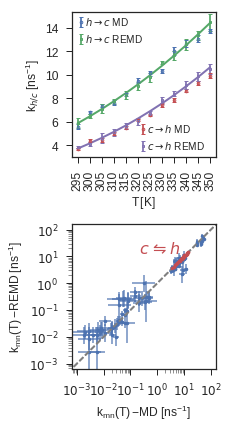

In [56]:
fig, ax = plt.subplots(2,1,figsize=(3,6.0))
ax0, ax1 = ax[0], ax[1]

sns.set_style("ticks")
#sns.set_style("ticks",  {"xtick.major.size": 12, "ytick.major.size": 12})

forward =(0,0,0,1)
backward=(0,1,0,0)

leg_d = {forward : r'$h \rightarrow c$', backward : r'$c \rightarrow h$'}

md_c_l = [cl[0], cl[2]]

legend_l1 = []
label_l1 = []

for ci, trans in enumerate([forward, backward]):
    _label = "{} ".format(leg_d[trans]) + r"$\mathregular{MD}$"
    _md_plot = md_rt_s_ln[(md_rt_s_ln.type == trans)] 
    _yerr = err_md3[trans] / np.sqrt(14)
    
    l = ax0.errorbar(_md_plot.temperature, _md_plot.rate,yerr=_yerr, 
                     fmt="o",
            label=_label, capthick=1.0, c=md_c_l[ci], mfc="None", mec=md_c_l[ci], mew=1.0,
                    markersize=2.6, capsize=2) 
    legend_l1.append(l)
    label_l1.append(_label)

remd_c_l = [cl[1], cl[3]]  
legend_l2 = []
label_l2 = []


for ci, trans in enumerate([forward, backward]):
    _label = "{} ".format(leg_d[trans]) + r"$\mathregular{REMD}$"
    _remd_plot = r_s_ln[(r_s_ln.type == trans)]
    _yerr = remd_st1_err[trans]/ np.sqrt(4)
    # [_remd_plot.err_m, _remd_plot.err_p]
    l =ax0.errorbar(_remd_plot.temperature, _remd_plot.rate,yerr=_yerr , fmt="s"
            ,label=_label, capthick=1.0, c=remd_c_l[ci], mfc="None", mec=remd_c_l[ci], mew=1.0,
                   markersize=2.6, capsize=2)
    legend_l2.append(l)
    label_l2.append(_label)
    
l1 = ax0.legend([legend_l1[0],legend_l2[0]], [label_l1[0], label_l2[0]], loc=[-0.03, 0.75],
                handletextpad=-0.6) # loc=(-0.03,0.51)
l2 = ax0.legend([legend_l1[1],legend_l2[1]], [label_l1[1],label_l2[1]], loc=(0.4, 0.01),
                handletextpad=-0.6)
ax0.add_artist(l1)

font_size=12
rotation=90
ax0.set_xticks(np.arange(12))
ax0.set_xticklabels(tmp_l.astype(int), rotation=rotation)
ax0.set_yticks(np.arange(4,20,step=2))

ax0.set_ylabel(r"$\mathregular{k}_{h/c}}$ [$\mathregular{ns^{-1}}$]", fontsize=font_size)
ax0.set_xlabel("$\mathregular{T \, [K]}$", fontsize=font_size)
ax0.set_xlim(-0.5,11.5)
ax0.set_ylim(3,15.3)


R=8.3145
x = np.arange(12)
ax0.plot(x, A_hc*np.exp(- Ea_hc / (R*tmp_l)), '-', c=cl[1], lw=2.0, label="_nolegend_")
ax0.plot(x, A_ch*np.exp(- Ea_ch / (R*tmp_l)), '-', c=cl[3], lw=2.0, label="_nolegend_")

fig, ax1 = plot_kji(r_s_ln, md_rt_s_ln, err_is_err_bar=False, fig_ax = [fig, ax1],
                   highlight_trans=[(0,0,0,1),(0,1,0,0)], highlight_colour=cl[2],
                    verbose=True, highlight_alpha=0.0)

fig, ax1 = plot_kji(r_s_ln, md_rt_s_ln, err_is_err_bar=False, fig_ax = [fig, ax1],
                   highlight_trans=[(0,0,0,1),(0,1,0,0)], highlight_colour=cl[2],
                    verbose=False, other_pts_alpha=0.0, highlight_alpha=1, highlight_only=True)

ax1.set_ylim(10**-3.2, 10**2.2)
ax1.set_xlim(10**-3.2, 10**2.2)

ax1.set_xlabel(
    r'$\mathregular{k_{mn} (T)} \, \mathregular{-MD} \; \mathregular{[ns^{-1}]}$', fontsize=12)
ax1.set_ylabel(r'$\mathregular{k_{mn} (T)} \, \mathregular{-REMD} \; \mathregular{[ns^{-1}]}$', fontsize=12)
ax1.tick_params(which='minor', length=4)

ax1.text(10**-0.69, 13, r"$c \; \leftrightharpoons \; h$", fontsize=16,color=cl[2])

#ax1.yaxis.set_label_coords(-0.25,0.5)
#ax1.axis('equal')
#ax1.text(10**-3.61,160, "B", fontsize=18)
#ax0.text(-2.6,16.0, "A", fontsize=18)

#ax1.text(10**-5.3,150, "B", fontsize=18)
#ax0.text(-5,15.50, "A", fontsize=18)

ax1.tick_params(axis="both", which="major", labelsize="12")
ax0.tick_params(axis="both", which="major", labelsize="12")



ax1.set_xticks([10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2])
ax1.set_yticks([10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2])

ax0.get_xlim()
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.set_aspect((x1-x0)/(y1-y0))

ax1.set_aspect('equal')


fig.subplots_adjust(left=0.1)

fig.tight_layout()

fig.savefig("plot/ala_rates.pdf")
fig.savefig("plot/ala_rates.png")

# quick comparison

In [ ]:

mdc_r.head()


In [ ]:
rates.head()